In [1]:
from pyiron_workflow import Workflow
from typing import Optional

In [2]:
@Workflow.wrap.as_function_node()
def AddOne(x: Optional[float | int] = None):
    y = x + 1
    return y

In [3]:
@Workflow.wrap.as_function_node()
def AddTwo(x):
    y = x + 2
    return y

In [4]:
wf_add = Workflow("Add")
wf_add.a = AddOne(x=3)
wf_add.b = AddTwo(wf_add.a)

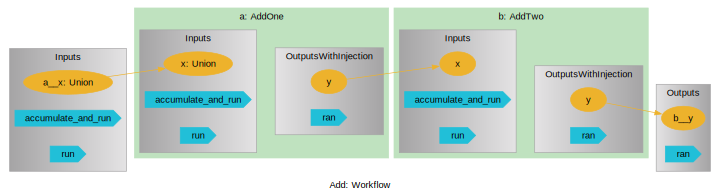

In [5]:
wf_add.draw(size=(10,10))

In [6]:
wf_add()

{'b__y': 6}

In [7]:
from python.pyironflow import PyironFlow
import pyiron_nodes as pn

2024-09-10 10:05:55,260 - pyiron_log - WARNING - pyiron found a 'templates' folder in the /home/tlakshmi/pyiron/resources resource directory. These are no longer supported in pyiron_base >=0.7.0. They are replaced by Project.create_job_class() and Project.wrap_python_function().


In [8]:
pf = PyironFlow()
pf.gui

In [9]:
pn.large_scale_atomistic.property.theoretical_griffith

<module 'pyiron_nodes.large_scale_atomistic.property.theoretical_griffith' from '/home/tlakshmi/hackathon_pyiron_2024/temp/hackathon-2024/pyiron_hackathon/Large-scale/test_pyiron-xyflow/pyiron-xyflow/pyiron_nodes/large_scale_atomistic/property/theoretical_griffith.py'>

In [10]:
c11=525
c12=192
c13=1000
c33=1000
c44=177.5
crystal='bcc'
gamma_s=3.933
orient_x='5 5 2'
orient_y='-1 -1 5'
orient_z='1 -1 0'

In [11]:
from ase.lattice.cubic import BodyCenteredCubic
ase_atoms = BodyCenteredCubic(directions = [[0, -1, 0], [1, 0, 0], [0, 0, 1]],
                          size=(200, 200, 4),
                          symbol='W',
                          pbc=(0,0,1),
                         latticeconstant = 3.165)

In [12]:
ase_atoms

Lattice(symbols='W320000', pbc=[False, False, True], cell=[633.0, 633.0, 12.66])

In [13]:
from ase.visualize import view

In [14]:
view(ase_atoms, viewer='ngl')

In [15]:
#for atom in ase_atom:
#        print(atom)

In [16]:
xcenter = 6.31417500e+02/2
ycenter = 6.31417500e+02/2
radius = 300

In [17]:
#def cut_cylinder(atoms, xcenter, ycenter, radius):
del ase_atoms[[atom.index for atom in ase_atoms if (atom.position[0]-xcenter)*(atom.position[0]-xcenter)+(atom.position[1]-ycenter)*(atom.position[1]-ycenter) > 90000]]

In [18]:
ase_atoms

Lattice(symbols='W225856', pbc=[False, False, True], cell=[633.0, 633.0, 12.66])

In [19]:
view(ase_atoms, viewer='ngl')

In [20]:
len(ase_atoms.get_positions())

225856

In [21]:
from ovito.pipeline import StaticSource, Pipeline
from ovito.io.ase import ase_to_ovito

/home/tlakshmi/hackathon_pyiron_2024/lib/python3.11/site-packages/ovito/_extensions/anari.py:2: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? This will likely lead to conflicts with existing libraries in the Anaconda environment, and import of the OVITO module may fail with an error related to the Qt framework. To fix this, please uninstall the ovito pip package by running 'pip uninstall -y ovito PySide6' and then install the OVITO Anaconda package provided by OVITO GmbH. Visit https://docs.ovito.org/python/introduction/installation.html for further instructions. If you would rather like to ignore this warning message, add the following code to the top of your Python script:

  import warnings
  warnings.filterwarnings('ignore', message='.*OVITO.*PyPI')

  import ovito._extensions.pyscript


In [22]:
data = ase_to_ovito(ase_atoms)

In [23]:
pipeline = Pipeline(source = StaticSource(data = data))
pipeline.add_to_scene()

In [24]:
from ovito.vis import Viewport
from ipywidgets import Layout
vp = Viewport()
vp.create_jupyter_widget(layout=Layout(width='100%', height='800px'))

JupyterViewportWidget(layout=Layout(height='800px', width='100%'))